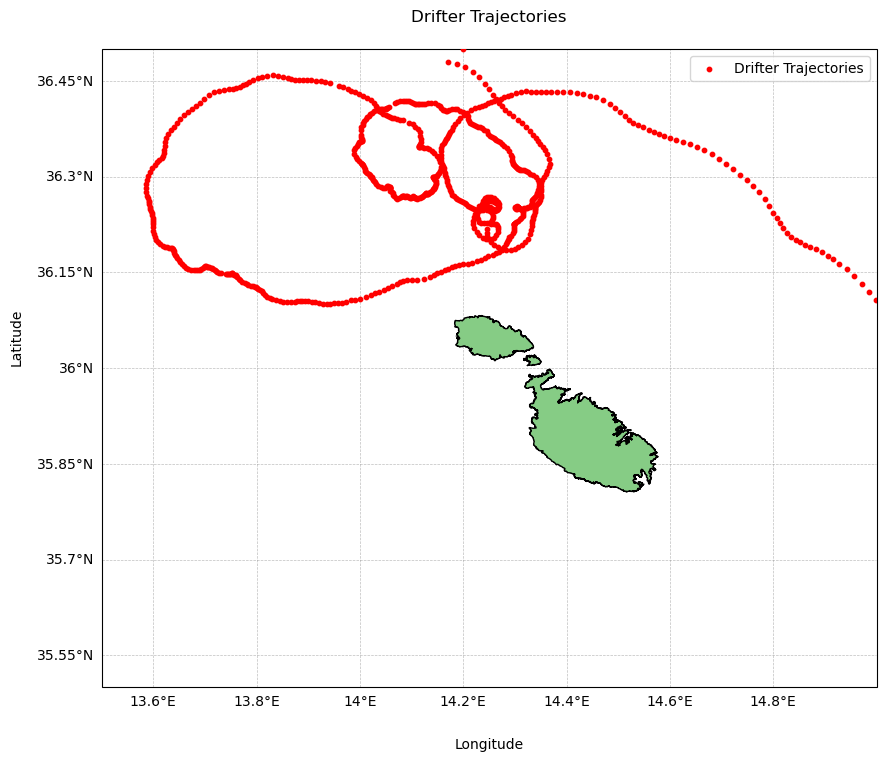

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd

# Path to the drifter data file
drifter_data_path = "../Data/drifter_trajectories/20210621_WaterColours_Drifters/Drifter 6501"

# Load the drifter data
drifter_data = pd.read_csv(drifter_data_path, delimiter='\t')

# Load the shapefile for Malta's coastline
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
malta_coastline = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Define the geographic extent of the plot based on the broader area around Malta
extent = [13.50, 15.00, 35.50, 36.50]  
ax.set_extent(extent)

# Plot the coastline of Malta
malta_coastline.plot(ax=ax, color='#86CC85', edgecolor='black', linewidth=1, zorder=3)

# Plot the drifter trajectories with higher z-order to ensure visibility
ax.scatter(drifter_data['lon'], drifter_data['lat'], s=10, color='red', marker='o', 
           transform=ccrs.Geodetic(), zorder=5, label='Drifter Trajectories')

# Customize the plot
plt.title('Drifter Trajectories', pad=20)
ax.text(-0.1, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
ax.legend(loc='upper right')

# Add gridlines and labels to improve map readability
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Display the plot
plt.show()

In [43]:
import re

# Improved function to convert DMS to decimal degrees
def dms_to_decimal(dms_str):
    # Regular expression to match DMS components
    dms_pattern = re.compile(r"(\d+)[°] (\d+)['] (\d+\.\d+)['\"]")
    match = dms_pattern.search(dms_str)
    if match:
        degrees, minutes, seconds = map(float, match.groups())
        return degrees + (minutes / 60) + (seconds / 3600)
    else:
        return None

# Path to the drifter data file
drifter_data_path = "../Data/drifter_trajectories/20210630_CODE_Calypso_South_Redeployment_experiment/CODE 11-300534061782530-20210702T050559UTC.csv"

# Load the drifter data with the correct encoding
drifter_data = pd.read_csv(drifter_data_path, delimiter=',', encoding='latin1')

# Strip leading spaces from column names
drifter_data.columns = drifter_data.columns.str.strip()

# Convert LATITUDE and LONGITUDE from DMS to decimal degrees
drifter_data['DECIMAL_LATITUDE'] = drifter_data['LATITUDE'].apply(dms_to_decimal)
drifter_data['DECIMAL_LONGITUDE'] = drifter_data['LONGITUDE'].apply(dms_to_decimal)

# Load the shapefile for Malta's coastline
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
malta_coastline = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Define the geographic extent of the plot based on the broader area around Malta
extent = [13.50, 15.00, 35.50, 36.50]
ax.set_extent(extent)

# Plot the coastline of Malta
malta_coastline.plot(ax=ax, color='#86CC85', edgecolor='black', linewidth=1, zorder=3)

# Plot the drifter trajectories with higher z-order to ensure visibility
ax.scatter(drifter_data['DECIMAL_LONGITUDE'], drifter_data['DECIMAL_LATITUDE'], s=10, color='red', marker='o', transform=ccrs.Geodetic(), zorder=5, label='Drifter Trajectories')

# Customize the plot
plt.title('Drifter Trajectories', pad=20)
ax.text(-0.1, 0.55, 'Latitude', va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center', rotation='horizontal', rotation_mode='anchor', transform=ax.transAxes)
ax.legend(loc='upper right')

# Add gridlines and labels to improve map readability
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Display the plot
plt.show()

In [34]:
# Assuming pandas is imported as pd
import pandas as pd

# Load the data
file_path = "../Data/drifter_trajectories/20210630_CODE_Calypso_South_Redeployment_experiment/CODE 11-300534061782530-20210702T050559UTC.csv"
data = pd.read_csv(file_path, encoding='latin1')

# Rename columns
data.rename(columns={' LATITUDE': 'latitude', ' LONGITUDE': 'longitude'}, inplace=True)

# Display the first few rows of the modified dataframe
print(data.head())

# Save the updated DataFrame to a new CSV file
data.to_csv('updated.csv', index=False)

       Data Date (UTC)         latitude        longitude   YEAR   DAY   HOUR   
0  2021-06-28 05:40:00   35° 51.81996 '   14° 33.64860 '   2021   179      5  \
1  2021-06-28 05:30:00   35° 51.81996 '   14° 33.64860 '   2021   179      5   
2  2021-06-28 05:20:00   35° 51.81996 '   14° 33.64860 '   2021   179      5   
3  2021-06-28 05:10:00   35° 51.82512 '   14° 33.64344 '   2021   179      5   
4  2021-06-28 05:00:00   35° 51.81480 '   14° 33.64860 '   2021   179      5   

    MIN   GPS_YEAR   GPS_DAY   GPS_HOUR   GPS_MIN   SST   SBDTIME   VBAT   
0    40       2021       179          5        40  27.6         9  14.92  \
1    30       2021       179          5        30  27.6        11  14.84   
2    20       2021       179          5        20  27.3         8  14.84   
3    10       2021       179          5        10  27.1         7  14.84   
4     0       2021       179          5         0  26.7         6  14.84   

    TTFF   FOM   MAXDB    AT                              Repo

In [42]:
import pandas as pd

# Load the data
file_path = "../Data/drifter_trajectories/20220525_CODE_Summer_deployment_with_Float/CODE 8-300534060715820-20220722T063402UTC.csv"
data = pd.read_csv(file_path, encoding='latin1')

# Rename columns
data.rename(columns={' LATITUDE': 'latitude', ' LONGITUDE': 'longitude'}, inplace=True)

# Function to convert latitude and longitude to KML format
def convert_to_kml(row):
    return f"<Placemark><name>{row['Data Date (UTC)']}</name><Point><coordinates>{row['longitude']},{row['latitude']},0</coordinates></Point></Placemark>"

# Convert latitude and longitude to KML format
data['kml'] = data.apply(convert_to_kml, axis=1)

# Save the KML data to a file
with open('updated1.kml', 'w') as f:
    f.write("<?xml version='1.0' encoding='UTF-8'?>\n")
    f.write("<kml xmlns='http://www.opengis.net/kml/2.2'>\n")
    f.write("<Document>\n")
    for kml_row in data['kml']:
        f.write(kml_row + '\n')
    f.write("</Document>\n")
    f.write("</kml>")

data

,Data Date (UTC),latitude,longitude,YEAR,DAY,HOUR,MIN,GPS_YEAR,GPS_DAY,GPS_HOUR,GPS_MIN,SST,SBDTIME,VBAT,TTFF,FOM,MAXDB,AT,Report Body,kml
0,2022-07-09 13:00:00,34.137560,15.712092,2022,190,13,0,2022,190,13,4,28.1,11,10.44,232,3,48,-33.8,597CD030D597CD12C0D0915CC574F00B565100,<Placemark><name>2022-07-09 13:00:00</name><Po...
1,2022-07-09 12:00:00,34.136958,15.716134,2022,190,12,0,2022,190,12,2,28.1,46,10.68,118,3,45,-33.8,597CC030D597CC0AC0CFB15CDCBBED2E5C5100,<Placemark><name>2022-07-09 12:00:00</name><Po...
2,2022-07-09 09:00:00,34.135324,15.733592,2022,190,9,0,2022,190,9,4,27.9,52,11.08,232,3,47,-33.8,597C9030B597C912C0CD515D4274EF34665100,<Placemark><name>2022-07-09 09:00:00</name><Po...
3,2022-07-09 08:00:00,34.139624,15.750276,2022,190,8,0,2022,190,7,3,27.9,54,11.08,254,3,43,-33.8,597C8030B597C70EC0D3915DA37FEB36665100,<Placemark><name>2022-07-09 08:00:00</name><Po...
4,2022-07-09 06:00:00,34.143236,15.758102,2022,190,6,0,2022,190,6,2,27.9,54,11.08,168,3,44,-33.8,597C6030B597C60AC0D8D15DD0D4EC36665100,<Placemark><name>2022-07-09 06:00:00</name><Po...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,2022-05-25 11:00:00,35.968156,14.209844,2022,145,11,0,2022,145,11,0,21.0,9,15.00,24,2,46,-33.7,5922B02C65922B02CB35513AA70CAE09C85180,<Placemark><name>2022-05-25 11:00:00</name><Po...
1101,2022-05-25 10:30:00,35.964802,14.213026,2022,145,10,30,2022,145,10,30,21.0,10,15.00,24,2,46,-33.7,5922A7AC65922A7ACB30713AB98CAE0AC85180,<Placemark><name>2022-05-25 10:30:00</name><Po...
1102,2022-05-25 10:00:00,35.961792,14.215778,2022,145,10,0,2022,145,10,0,21.0,11,15.00,24,2,46,-33.7,5922A02C65922A02CB2C113AC98CAE0BC85180,<Placemark><name>2022-05-25 10:00:00</name><Po...
1103,2022-05-25 09:30:00,35.959470,14.218014,2022,145,9,30,2022,145,9,30,20.9,8,15.00,24,3,45,-33.7,592297AC5592297ACB28B13AD68CED08C85180,<Placemark><name>2022-05-25 09:30:00</name><Po...
